In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
with open("simple_data.csv", "r") as file_reader:
    text = file_reader.read()
    print(text, type(text))

coord_x,coord_y,category
203.1759000426081,185.1071485096083,a
178.99912121028828,205.58741572632812,a
154.05552811391857,192.33988143581485,a
211.1601356331206,209.6339474339265,a
185.96240491835968,191.85261872384513,a
207.07512540414015,256.4536870024682,a
195.60319189301947,267.83041809121744,a
195.473890118394,289.93493672636134,a
198.57456205761994,310.59801020584763,a
232.39487194261037,233.84602938814373,a
245.00545475857803,254.01494488885527,a
233.24471840247702,271.2668381539586,a
305.9469377750743,263.38150592511533,a
253.97030970480364,186.95725348805786,a
212.13938962366427,169.34038412306353,a
281.37181640766164,233.55566569191535,a
220.42805086969568,228.60272950491736,a
175.26627248325337,198.67672283093378,a
187.86597513107432,236.31379815745225,a
137.71987206956203,216.74903561946388,a
170.78599071162932,199.04583538049468,a
203.2339505091082,289.2969426062731,a
153.59907510189362,222.83376927598795,a
162.83217730095774,276.8547246962037,a
197.49313202575902,295.3175

In [127]:
df = pd.read_csv("simple_data.csv")
df

,coord_x,coord_y,category
0,203.175900,185.107149,a
1,178.999121,205.587416,a
2,154.055528,192.339881,a
3,211.160136,209.633947,a
4,185.962405,191.852619,a
...,...,...,...
171,462.432157,242.373334,b
172,490.564537,235.205822,b
173,444.010085,262.168997,b
174,424.691566,226.654325,b


<Axes: xlabel='coord_x', ylabel='coord_y'>

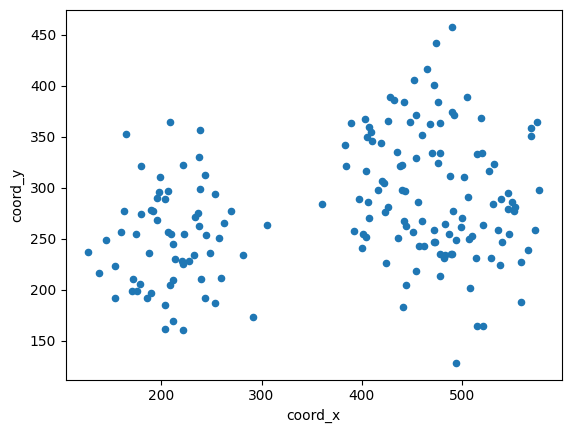

In [128]:
df.plot.scatter(x="coord_x", y="coord_y")

<Axes: xlabel='coord_x', ylabel='coord_y'>

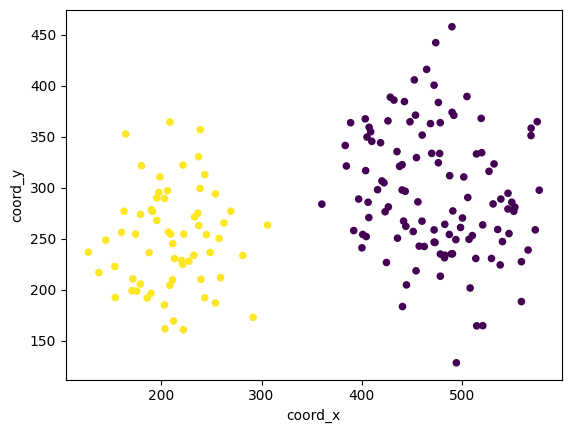

In [129]:
df.plot.scatter(x="coord_x", y="coord_y",c=df["category"] == "a")

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
# x 
data = df[["coord_x", "coord_y"]]
# y 
target = df[["category"]]



In [132]:
data.head(2)

,coord_x,coord_y
0,203.175900,185.107149
1,178.999121,205.587416


In [133]:
target.head(2)

,category
0,a
1,a


In [134]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

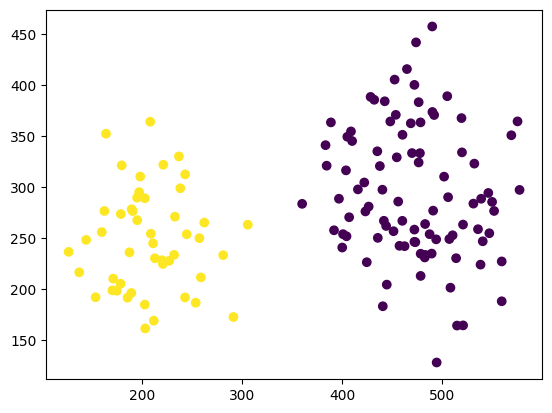

In [135]:
plt.scatter(x_train["coord_x"], x_train["coord_y"], c=y_train["category"] == "a")


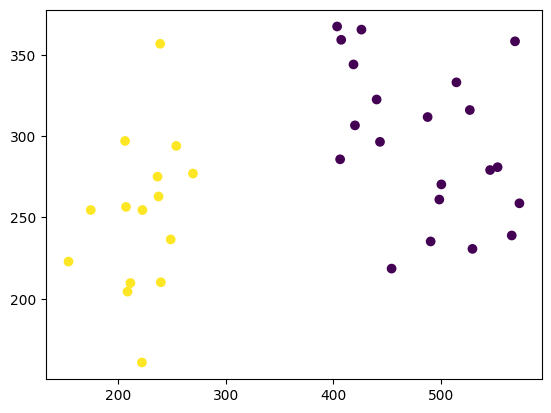

In [136]:
plt.scatter(x_test["coord_x"], x_test["coord_y"], c=y_test["category"] == "a")

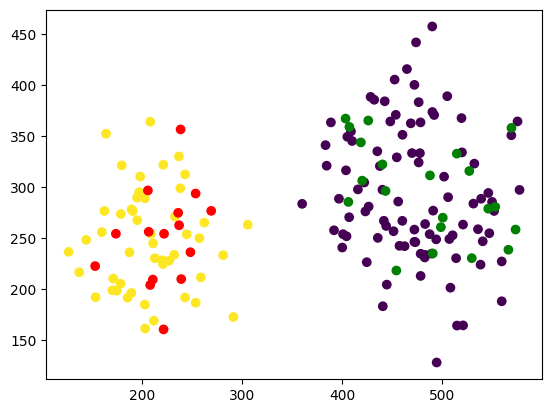

In [137]:
plt.scatter(x_train["coord_x"], x_train["coord_y"], c=y_train["category"]  == "a")
plt.scatter(x_test["coord_x"], x_test["coord_y"], c=y_test["category"].map({"a": "red", "b":"green"}))

In [140]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [141]:
knn_model.predict([[200, 200]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['a'], dtype=object)

In [142]:
knn_model.predict([[500, 350]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['b'], dtype=object)

In [143]:
knn_model.score(x_test, y_test)

1.0

In [146]:
knn_model.predict([[340, 280]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['b'], dtype=object)

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [149]:
tree_model.score(x_test, y_test)

1.0

# pip install graphviz

In [151]:
from sklearn.tree import export_graphviz
import graphviz

In [152]:
exported_data = export_graphviz(tree_model, feature_names=["coord_x", "coord_y"], class_names=["a", "b"], filled=True, rounded=True)
exported_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="coord_x <= 333.067\\ngini = 0.451\\nsamples = 140\\nvalue = [48, 92]\\nclass = b", fillcolor="#a0d0f3"] ;\n1 [label="gini = 0.0\\nsamples = 48\\nvalue = [48, 0]\\nclass = a", fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 92\\nvalue = [0, 92]\\nclass = b", fillcolor="#399de5"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [153]:
tree_source = graphviz.Source(exported_data)
tree_source.render("2Categoree", format="png")
tree_source.view()

'2Categoree.pdf'

In [157]:
x_line = np.ones(400) * 333.067
x_line

array([333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.067, 333.067, 333.067, 333.067, 333.067, 333.067,
       333.067, 333.

[]

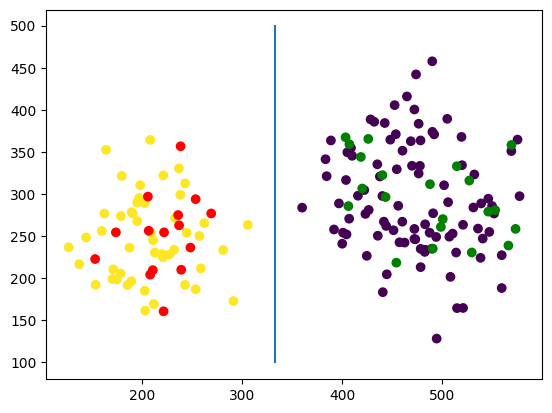

In [158]:
plt.scatter(x_train["coord_x"], x_train["coord_y"], c=y_train["category"]  == "a")
plt.scatter(x_test["coord_x"], x_test["coord_y"], c=y_test["category"].map({"a": "red", "b":"green"}))


x_line = np.ones(400) * 333.067
y_line = np.arange(100, 500)
plt.plot(x_line, y_line)

plt.plot()